In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

plt.rcParams['font.sans-serif'] = "arial"
plt.rcParams['font.family'] = "arial"
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.linewidth'] = 3 
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 3

In [45]:
image_filename = str('via_nanoparticle_counter_csv.csv')

all_xpoints = []
all_ypoints = []
kind_of_np = []
scalebar_len_in_nm = []
image_name_sb = []
image_name_np = []

idx = 0
with open(image_filename, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        kind_of_shape = row['region_attributes'].split('"')
        if len(kind_of_shape) == 1: continue
            
        if kind_of_shape[3] == 'scalebar':
            scalebar_length = row['region_attributes'].split('"')[-2].split(' ')
            number = float(scalebar_length[0])
            if scalebar_length[1] == 'um':
                units = 1E3 # nm
            if scalebar_length[1] == 'nm':
                units = 1 # nm
    
            scale = number*units
            scalebar_len_in_pixels = float(row['region_shape_attributes'].split('"')[-3][1:-1])
            scalebar_len_in_nm.append(scale/scalebar_len_in_pixels)
            image_name_sb.append(row['filename'])
            print()
            print()
        else:
            xpoints = row['region_shape_attributes'].split('"')[-3][1:-1].split(',')
            xpoints[0] = xpoints[0][1:]; xpoints[-1] = xpoints[-1][:-1]
            xpoints = list(map(int, xpoints))
            all_xpoints.append(np.asarray(xpoints))
            
            ypoints = row['region_shape_attributes'].split('"')[-1][1:-1].split(',')
            ypoints[0] = ypoints[0][1:]; ypoints[-1] = ypoints[-1][:-1]
            ypoints = np.asarray(list(map(int, ypoints)))
            all_ypoints.append(np.asarray(ypoints))
        
            kind_of_np.append(row['region_attributes'].split('"')[-2])
            image_name_np.append(row['filename'])


In [ ]:

        
print(image_name_np)  
print(scalebar_len_in_nm)

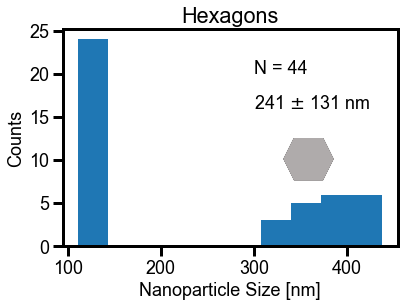

In [56]:
particle_size = np.zeros(len(all_ypoints))

for idx, val in enumerate(all_ypoints):
    a = np.array([all_xpoints[idx], all_ypoints[idx]])
    dist = np.zeros((len(all_xpoints[idx]),len(all_ypoints[idx]) ))
    for i in range(0,len(all_xpoints[idx])):
        for j in range(0,len(all_ypoints[idx])):
            dist[i,j] = np.round(np.sqrt(np.sum((a[:,i] - a[:,j])**2)))

    idx_name = np.where(np.isin(image_name_sb, image_name_np[idx]) == True)[0][0]
    particle_size[idx] = int(np.max(dist)*scalebar_len_in_nm[idx_name])

fig, ax = plt.subplots()


ax.hist(particle_size);
ax.set_ylabel('Counts')
ax.set_xlabel('Nanoparticle Size [nm]')
plt.text(300,20, str('N = ')+str( len(particle_size)));
plt.text(300,16, str(int(np.mean(particle_size)))+str(' $\pm$ ')+str( int(np.std(particle_size))  )+str(' nm'));
plt.title('Hexagons')
im = plt.imread('hexagon.png') 
newax = fig.add_axes([0.6,0.35,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(im);
newax.axis('off');




In [ ]:
all_points_x = [1438,1515,1543,1501,1430,1370,1423]
all_points_y = [565,573,641,711,711,634,570]
a = np.array([all_points_x, all_points_y])
dist = np.zeros((len(all_points_x),len(all_points_x) ))

for i in range(0,len(all_points_x)):
    for j in range(0,len(all_points_x)):
        dist[i,j] = np.round(np.sqrt(np.sum((a[:,i] - a[:,j])**2)))
    

print(np.max(dist))
plt.scatter(all_points_x, all_points_y)
print(max(all_points_x)-min(all_points_x))